<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/MedPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [83]:
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv('/content/sample_data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [85]:
df.shape

(1338, 7)

In [86]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [87]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [88]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [89]:
# LabelEncoder is great! I don't have to apply stupid maps anymore!

In [90]:
from sklearn.preprocessing import LabelEncoder
# sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
# smoker
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
# region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

In [91]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


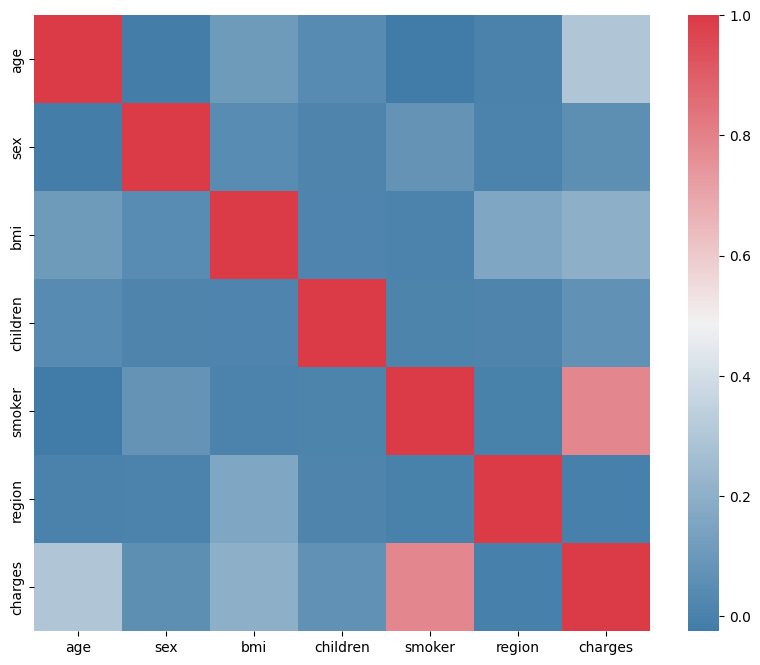

In [92]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax);

<Axes: xlabel='age', ylabel='Count'>

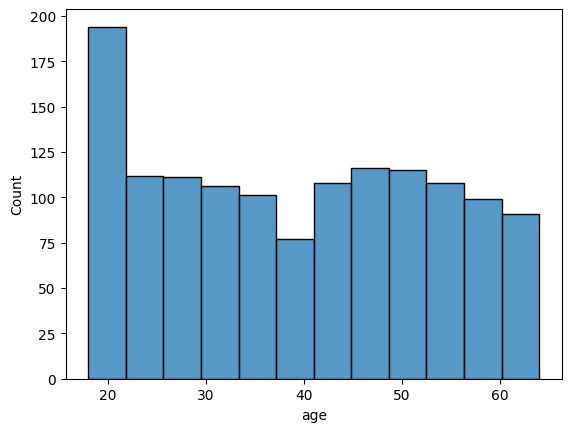

In [93]:
sns.histplot(data=df, x='age')

<Axes: xlabel='charges', ylabel='Count'>

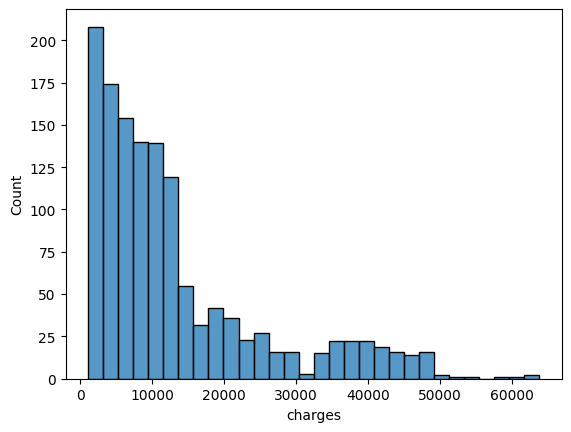

In [94]:
sns.histplot(data=df, x='charges')

In [95]:
sns.catplot?

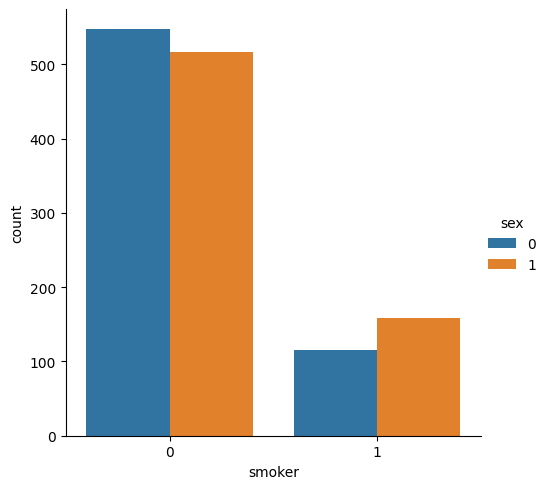

In [96]:
sns.catplot(data=df, x='smoker', hue='sex', kind='count');

In [97]:
# most people don't smoke here. It's cool👍

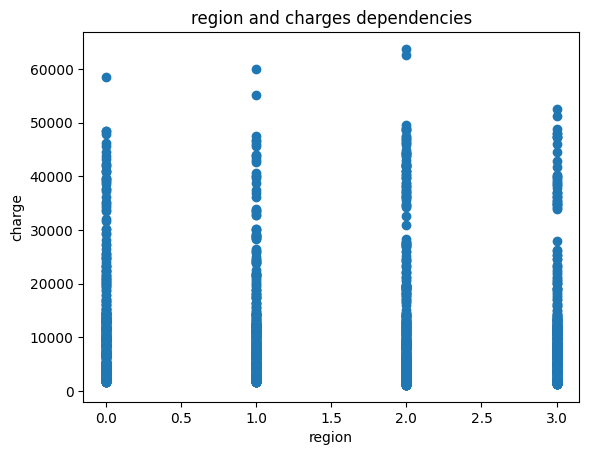

In [98]:
plt.title('region and charges dependencies')
plt.xlabel('region')
plt.ylabel('charge')
plt.scatter(x=df['region'], y=df['charges'])

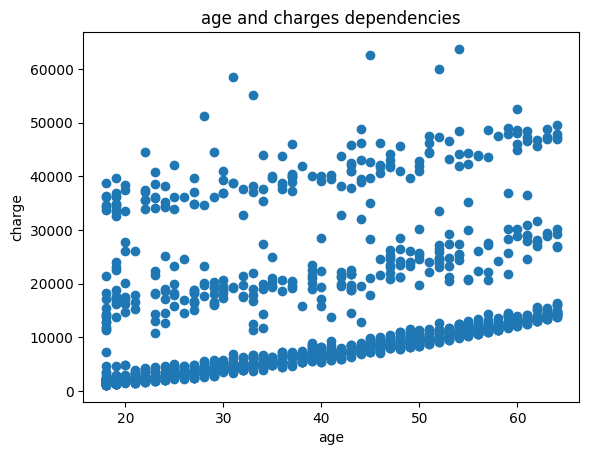

In [99]:
plt.title('age and charges dependencies')
plt.xlabel('age')
plt.ylabel('charge')
plt.scatter(x=df['age'], y=df['charges'])

In [100]:
sns.distplot?

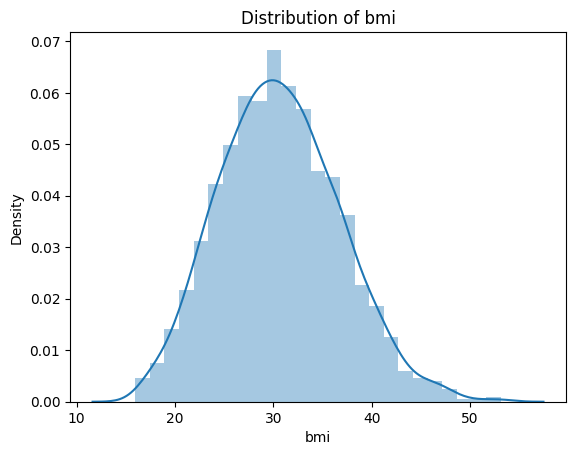

In [101]:
plt.title('Distribution of bmi')
sns.distplot(df['bmi']);

In [102]:
X = df.drop('charges', axis=1)
y = df.charges

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1003, 6), (1003,), (335, 6), (335,))

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

lr.score(X_test, y_test)

0.7562122715678437

In [106]:
from sklearn.preprocessing import PolynomialFeatures

In [108]:
X = df.drop(['charges','region'], axis = 1)
Y = df.charges

In [110]:
quad = PolynomialFeatures(degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad, Y, random_state=0)

plr = LinearRegression().fit(X_train, Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test, Y_test))

0.8849197344147227


In [112]:
# Stop for now...
# Good day!

Random experienced ML engineer reading this code:
___
<img src='https://media1.giphy.com/media/Wck09E7lHDabjhHbzJ/giphy.gif' width=50%><br>